<a href="https://colab.research.google.com/github/otanerifpb/AtividadePerceptron/blob/main/9_Exerc%C3%ADcio_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Perceptron

In [8]:
# Modelo Perceptron para Classificação criado por Thiago Moura

import numpy as np

class Perceptron:

  def __init__(self, teta, w, n, epochs):

    self.teta = teta
    self.w = w
    self.n = n
    self.epochs = epochs

  def train_perceptron(self,train_x,train_y):

    for i in range(self.epochs):
      for j in range(len(train_x)):

        u = sum(np.array(self.w) * np.array(train_x[j])) - self.teta # Função de Ativação

        y = 1 if u >= 0 else 0 # Função de Saída

        erro = train_y[j] - y

        self.w = list(np.array(self.w) + (self.n * np.array(train_x[j]) * erro))

        self.teta = self.teta + (self.n * -1 * erro)

  def predict_perceptron(self,test_x):

    results = []

    for i in range(len(test_x)):

        u = sum(np.array(self.w) * np.array(test_x[i])) - self.teta

        r = 1 if u >= 0 else 0
        results.append(r)

    return results

### Perceptron para resolver o AND e o OR

In [57]:
import numpy as np
############ AND
X1 = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y1 = np.array([0, 0, 0, 1])

############ OR
X2 = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y2 = np.array([0, 1, 1, 1])

In [58]:
from matplotlib.font_manager import X11FontDirectories
from sklearn import metrics

## 2) Treinar o AND e depois fazer o predict com a matriz x

## 1) Inicializar os parâmetros do Perceptron (de forma aleatória ou com 0 (zero))
# Parâmetros para Perceptron(teta, w, n, epochs)
# teta = 0, w = [0, 0], n = 0.05(0.01..0.05), 200(quantidade de repetição)
model1 = Perceptron(0, [0, 0], 0.05, 200)

model1.train_perceptron(X1, y1)
predictions1 = model1.predict_perceptron(X1)


acc1 = metrics.accuracy_score(predictions1, y1)
show1 = "{:.3f}".format(acc1*100)

print('Modelo Perceptron para Classificação (AND)')
print("Perceptron para Classificação(AND) " + "Acurrácia: {}%".format(show1))
print(list(predictions1))
print(list(y1))

Modelo Perceptron para Classificação (AND)
Perceptron para Classificação(AND) Acurrácia: 100.000%
[0, 0, 0, 1]
[0, 0, 0, 1]


In [87]:
from matplotlib.font_manager import X11FontDirectories
from sklearn import metrics

## 3) Treinar o OR e depois fazer o predict com a matriz x
model2 = Perceptron(0, [0, 0], 0.05, 200)

model2.train_perceptron(X2, y2)
predictions2 = model2.predict_perceptron(X2)

acc2 = metrics.accuracy_score(predictions2, y2)
show2 = "{:.3f}".format(acc2*100)

print('Modelo Perceptron para Classificação (OR)')
print("Perceptron para Classificação(OR) " + "Acurrácia: {}%".format(show2))
print(list(predictions2))
print(list(y2))

Modelo Perceptron para Classificação (OR)
Perceptron para Classificação(OR) Acurrácia: 100.000%
[0, 1, 1, 1]
[0, 1, 1, 1]


### Base de Classificação Sintética

In [13]:
## Função para plotar o dataset com o perceptron

def plot_linear_classifier(x, y, w, teta):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1, 100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + teta
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

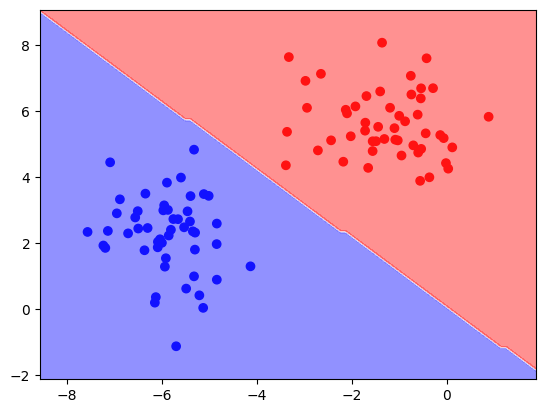

In [102]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X3, y3 = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234) # Gerar dataset com 2 clusters

## 4) Inicializar os parâmetros do Perceptron (de forma aleatória ou com 0 (zero))
model3 = Perceptron(0, [0, 0], 0.05, 200)

## 5) Treinar o Perceptron
model3.train_perceptron(X3, y3)
predictions3 = model3.predict_perceptron(X3)

## 6) Plotar o dataset com os parâmetros do Perceptron usando a função "plot_linear_classifier"
plot_linear_classifier(X3, y3, model3.w, model3.teta)

In [103]:
from sklearn import metrics

## 7) Fazer o predict do Perceptron usando a matriz x
predictions3 = model3.predict_perceptron(X3)

## 8) Calcular a acurácia com a função: "accuracy_score" e printar o resultado
acc3 = metrics.accuracy_score(predictions3, y3)
show3 = "{:.3f}".format(acc3*100)

print('Modelo Perceptron para Classificação')
print("Perceptron para Classificação " + "Acurrácia: {}%".format(show3))
print(list(predictions3))
print(list(y3))

Modelo Perceptron para Classificação
Perceptron para Classificação Acurrácia: 100.000%
[1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]
[1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0]


### Dataset Sintético

(-0.1, 1.1)

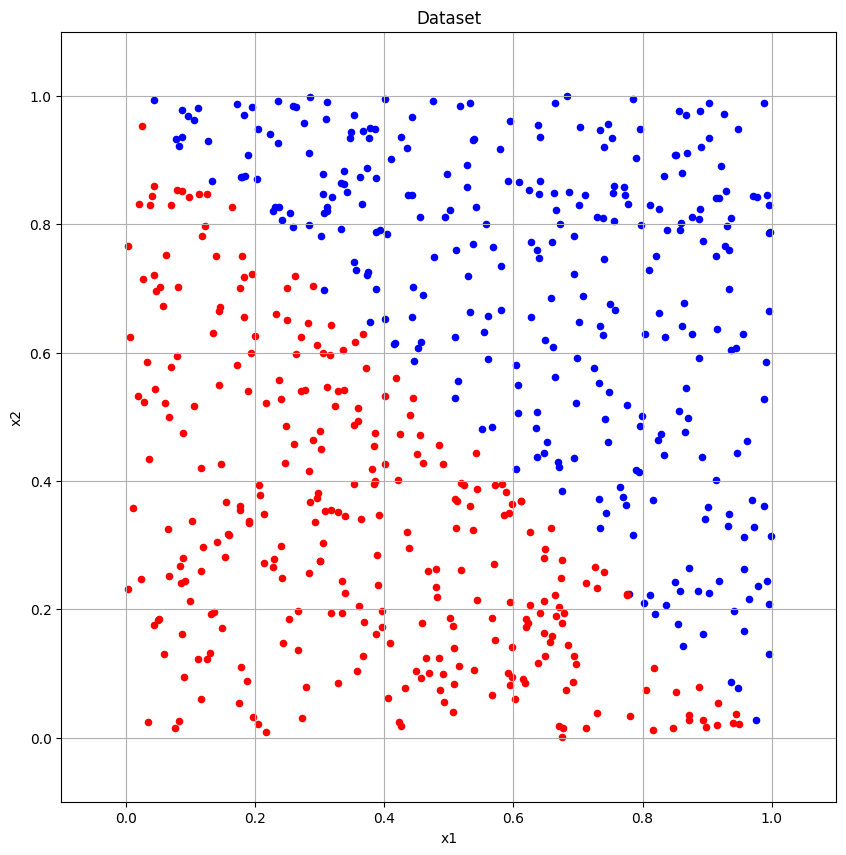

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))

#### Plotar o Dataset Sintético
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

def testing(inputs):
    answer = int(np.sum(inputs) > 1)
    return answer

df['y'] = df.apply(testing, axis=1)

df[df.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
df[df.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
plt.grid()
plt.title('Dataset')
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)

In [6]:
y = df['y'] # extrai a primeira coluna, que é o label
X = df.loc[:, 'x1':'x2']

#X.head()
#y.head()

In [67]:
from sklearn.model_selection import train_test_split

## 9) Separar os dados em treinamento e teste
res = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=None, stratify = y)
X_train, X_test, y_train, y_test = res

## 10) Inicializar o Perceptron com os parâmetros necessários
model4 = Perceptron(0, [0, 0], 0.05, 300)

## 11) Converter os conjuntos em list, ex: "train_x = X_train.values.tolist()"
train_x = X_train.values.tolist()
train_y = y_train.values.tolist()

test_x = X_test.values.tolist()
test_y = y_test.values.tolist()

## 12) Treinar o perceptron
model4.train_perceptron(train_x,train_y)

Modelo Perceptron para Classificação
Perceptron para Classificação Acurrácia: 100.000%
[0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1]
[0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1]


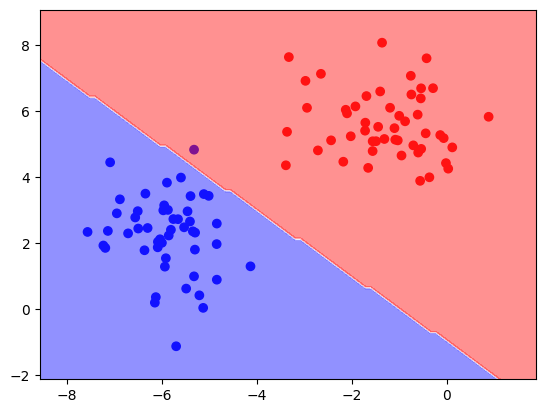

In [68]:
from sklearn.datasets import make_blobs
from sklearn import metrics

## 13) Fazer o predict do Perceptron usando a matriz x
predictions4 = model4.predict_perceptron(test_x)

## 14) Calcular a acurácia com a função: "accuracy_score" e printar o resultado
acc4 = metrics.accuracy_score(predictions4, test_y)
show4 = "{:.3f}".format(acc4*100)

print('Modelo Perceptron para Classificação')
print("Perceptron para Classificação " + "Acurácia: {}%".format(show4)) # ou print("Acurrácia: {}%".format(show4))
print(list(predictions4))
print(list(test_y))

test_x, test_y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)
plot_linear_classifier(test_x, test_y, model4.w, model4.teta)